# Описание задачи

Этот датасет содержит 18 тысяч описаний должностей, из которых около 800 - поддельные. Данные состоят из текстовой информации и метаинформации о вакансиях. Набор данных можно использовать для создания моделей классификации, которые могут изучить мошеннические описания должностных обязанностей.

По вакансии с признаками необходимо опредить, к какому классу принадлежит вакансия: настоящая либо фальшивая.

# Подключаем необходимые библиотеки

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 

import pandas as pd             
import seaborn as sns           
import sklearn 

# Подключаем нужный датасет с данными

In [2]:
df = pd.read_csv("fake_job_postings.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

# Обработка и визуализация данных

In [4]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


## Признаки

1\. `job_id` - уникальный идентификатор вакансии

2\. `title` - Заголовок объявления о вакансии.

3\. `location` - Географическое расположение вакансии.

4\. `department` - Корпоративный отдел (например, продажи).

5\. `salary_range` - Ориентировочный диапазон заработной платы (например, от 50 000 до 60 000 долларов США).

6\. `company_profile` - Краткое описание компании.

7\. `description` - Подробное описание вакансии.

8\. `requirements` - требования к сотруднику.

9\. `benefits` - льготы от работодателя.

10\. `telecommuting` - удаленная работа (true - да, false - нет).

11\. `has_company_logo` - Наличие логотипа компании (true - да, false - нет).

12\. `has_questions` - Проверочные вопросы при устройстве (true - да, false - нет).

13\. `employment_type` - Полный, Неполный рабочий день, Контракт и т. д.

14\. `required_experience` - Исполнительный, Начальный уровень, Стажер и т. д.

15\. `required_education` - Докторантура, степень магистра, бакалавр и т. д.

16\. `industry` - Автомобильная промышленность, информационные технологии, здравоохранение, недвижимость и т. д.

17\. `functions` - Консультации, инжиниринг, исследования, продажи и т. д.

18\. `fraudulent` - атрибут классификации (1 - оригинальная вакансия, 0 - фальшивая вакансия)

Задача прогноза - определить, настоящая ли вакансия или фальшивая.

In [5]:
print(df.shape)
print(df.columns)

(17880, 18)
Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


## Описательная статистика и визуализация данных

In [6]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


1\. `count` - число объектов

2\. `mean` - среднее арифметическое.

3\. `std` - разброс величины

4\. `min` - минимальная величина в выборке

5\. `max` - максимальная величина в выборке

## Диаграмма разброса

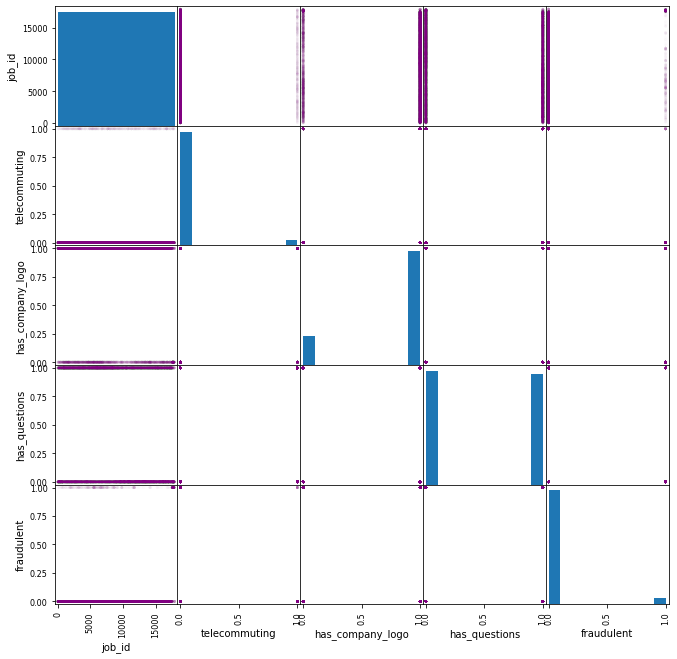

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = .01, figsize = (11, 11), color='purple')
pass

## Корреляционная матрица

In [8]:
corr_matrix = df.corr()
corr_matrix

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


<AxesSubplot:>

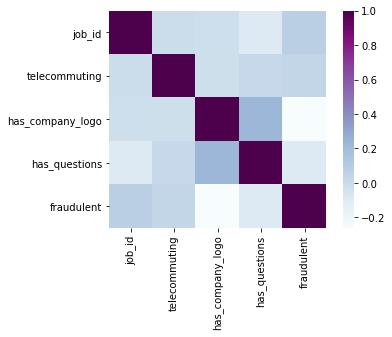

In [9]:
sns.heatmap(corr_matrix, square=True, cmap='BuPu')

Исходя из корреляционной матрицы видно, что признаки между собой очень слабо связаны. Практически не коррелируют между собой.

### Разнородность классов:

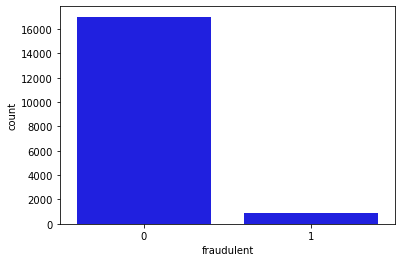

In [10]:
sns.countplot(x='fraudulent', data=df, color='blue')
pass

# Отбор признаков
Для предсказания оригинальности вакансии будем использовать все признаки, кроме: `job_id`, `location`, `department`, `salary_range`, `description`, `title`, `company_profile`, `benefits`, `requirements`.

In [11]:
df=df.drop(['job_id','location','department','salary_range','description','title','company_profile','benefits','requirements'],axis=1)


## Заполнение пропущенных значений

In [12]:
df.isnull().sum()

telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

Обработаем пропущенные значения:

In [13]:
columns_list=list(df.columns)

for i in columns_list:
    if df[i].dtype=='object':
        df[i]=df[i].replace(np.nan,df[i].mode()[0],regex=True)

df.isnull().sum()

telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [14]:
df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [15]:
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...
17875,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
17876,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
17878,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


# Классификация

### Поскольку числовые данные находятся в интервале [0,1], а нормировка строковых признаков не проводится (таким признакам будут присвоены метки), нормировка данных не производится.

## Разбиение на тестовую и обучающую выборку

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#Присваивание меток объектам типа 'object'
for i in columns_list:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])
        
x=df.drop(['fraudulent'],axis=1)
y=df['fraudulent']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Метод KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

### Точность классификатора на обучающей и тестовой выборке:

In [18]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train: ", train_acc)
print("Test: ",  test_acc)

Train:  0.9674217002237137
Test:  0.9664429530201343


### Вероятность ошибки классификатора на обучающей и тестовой выборке:

In [20]:
print('Train_error: ', 1 - train_acc)
print('Test_error: ', 1 - test_acc)

Train_error:  0.032578299776286346
Test_error:  0.03355704697986572
